### Curse of dimensionality or manifold learning? 

Investigate the surprising effectiveness of KNN on MNIST datasets

In [57]:
import torch 
import numpy as np 
import sklearn
import torch.nn as nn 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [58]:
transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.1307,), (0.3081,))
])

# 2. Download and Load Training Data
train_set = datasets.MNIST(root='./data', train=True, download=False, transform=transform)

# 3. Download and Load Test Data
test_set = datasets.MNIST(root='./data', train=False, download=False, transform=transform)

In [59]:
def visualize (x, y, index): 
    # 1. Pick an index to visualize (e.g., the first image)
    flat_image = x[index]

    # 2. Reshape from (784,) back to (28, 28)
    reshaped_image = flat_image.reshape(28, 28)

    # 3. Plot it
    plt.figure(figsize=(4, 4))
    plt.imshow(reshaped_image, cmap='gray')
    plt.title(f"Label: {y[index]}")
    plt.axis('off') # Hide the X and Y pixel coordinates
    plt.show()

In [60]:
# convert to the tensors for processing, each image is flattened 
X_train = train_set.data.reshape(-1, 784).numpy()
y_train = train_set.targets.numpy()

X_test = test_set.data.reshape(-1, 784).numpy()
y_test = test_set.targets.numpy()

In [61]:
# KNN model 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)

# convert into searchable 
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


### Performance Breakdown 
- the accuracy of KNN across small batch of test pictures or the entire set is very high (>97%)
- even with normalization and no PCA, KNN works suprisingly well 

- **normalization preserves distances** 

In [62]:
# very high accuracy from knn 
accuracy = knn.score(X_test[:50], y_test[:50])
print(f"KNN Accuracy: {accuracy * 100:.2f}%")

KNN Accuracy: 100.00%


#### Let's visualize some of the samples and predictions to see what the model is looking at 

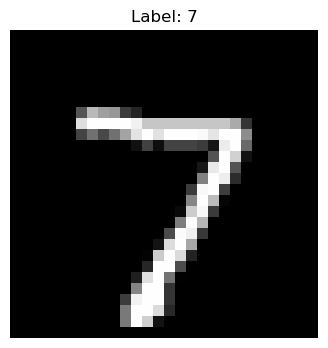

In [63]:
visualize(X_test, y_test, 0)

In [64]:
# visualize the predictions 
distances, indices = knn.kneighbors(X_test[:100], n_neighbors=3) 

### Analysis 
- the distances are actually not the same across all the images, so this is either 
    - not enough dimensions/pixels in the images, so curse of dimensionality hasn't settled in yet  

- The distances are clearly different for different figures 
- this can be explained by the fact that MNIST datas are too similar to each other, while the actual figure is in the middle, this makes the loss 0 at most of the places 
- this is shown by the cv coefficient, where the spread is not as large in MNIST, but becomes a lot worse in the CIFAR10 dataset. 

- also the fact that MNIST dataset is only 784 dimensional. In comparison, ImageNet has over 150k dimensions after flattening.

In [65]:
print("distances\n",distances)
print("indices\n", indices) # indices of the prediction from the training set 

distances
 [[ 676.58406721  793.98677571  862.67664858]
 [1162.9316403  1211.84446197 1285.92845835]
 [ 321.66286699  332.46353183  341.04838366]
 [1221.5825801  1228.23206276 1238.33880663]
 [1092.53466764 1096.04561949 1169.3438331 ]
 [ 298.12413522  312.12177111  373.04155265]
 [1302.71063556 1357.00700072 1469.77243136]
 [1289.69880205 1396.00250716 1407.50630549]
 [1735.34376998 1739.13886737 1797.21284215]
 [ 991.59770068 1146.70920464 1179.63511308]
 [1100.88646099 1122.04723608 1136.97317471]
 [1464.38109794 1466.57458044 1505.82203464]
 [ 828.29101166  869.67982614  902.63281571]
 [ 896.57626558  908.50151348  946.58914002]
 [ 621.28254442  634.43833428  635.52419309]
 [1416.46602501 1468.86146386 1499.20245464]
 [ 881.03859166 1060.23299326 1110.4643173 ]
 [ 809.24532745  865.75631675  866.85638949]
 [1634.39683064 1639.40903987 1720.6373819 ]
 [ 912.13705111  913.36301655  943.35306222]
 [ 966.17337989  988.53932648  994.1096519 ]
 [ 951.66748395  992.67114393 1027.34950236]

In [66]:
mean = np.mean(distances)
variance= np.var(distances)
std = np.std(distances)
cv = std / mean

print("Mean: ", mean)
print("Std: ", std)
print("variance: ", variance)
print(f"Relative spread (CV): {cv}")

Mean:  1106.9803575147573
Std:  321.3448014358306
variance:  103262.4814098334
Relative spread (CV): 0.29028952433923083


### Can KNN then work on more complicated datasets where images are not just black and white, and a small region makes the difference? 

In [67]:
# CIFAR-10 Dataset 
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
])
train_set= datasets.CIFAR10 (root='./data', train=True, download=True, transform=transform)
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

X_train = train_set.data.reshape(50000, -1) 
y_train = np.array(train_set.targets)

X_test = test_set.data.reshape(10000, -1)
y_test = np.array(test_set.targets)


In [68]:
knn = KNeighborsClassifier(n_neighbors=3)

# convert into searchable 
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [69]:
accuracy = knn.score(X_test[:50], y_test[:50])
print(f"KNN Accuracy on CIFAR-10: {accuracy * 100:.2f}%")

KNN Accuracy on CIFAR-10: 24.00%


In [70]:
distances, indices = knn.kneighbors(X_test[:100], n_neighbors=3) 

In [71]:
print("distances\n",distances)
print("indices\n", indices) 

distances
 [[2466.83035493 2577.04928164 2580.75919063]
 [2622.50224023 2658.83865626 2669.87321796]
 [2150.24742762 2168.28273064 2234.35315024]
 [1861.0214937  2094.64507733 2179.27143789]
 [2081.24217716 2088.95476255 2099.27225485]
 [2015.5185437  2041.77202449 2057.94800712]
 [3232.46175538 3257.60602283 3298.31532756]
 [2093.81517809 2118.90820943 2138.35216931]
 [2333.15837439 2440.93035542 2441.69306015]
 [2669.83314085 2764.34476866 2765.46379474]
 [1660.59627845 1727.49905933 1727.64087703]
 [2836.23905904 2868.13580571 2881.02169377]
 [2417.64079218 2492.87705272 2498.91156306]
 [3241.49224895 3314.17863128 3322.0785662 ]
 [2746.67617312 2794.47955799 2824.7465373 ]
 [2672.4511221  2675.54854189 2732.6113884 ]
 [3421.99649328 3619.65426526 3710.70114668]
 [2753.84131714 2767.34060065 2801.6621852 ]
 [2190.89821763 2226.47479213 2232.08646786]
 [2384.30073606 2524.73840229 2539.36625952]
 [3140.57717625 3150.78164905 3175.60718604]
 [2588.17464635 2639.7043395  2795.2270033 ]

In [72]:
mean = np.mean(distances)
variance= np.var(distances)
std = np.std(distances)
cv = std / mean

print("Mean: ", mean)
print("Std: ", std)
print("variance: ", variance)
print(f"Relative spread (CV): {cv}")

Mean:  2419.365489066154
Std:  499.26108098103794
variance:  249261.62698235453
Relative spread (CV): 0.20636033837688025


### Why Worse at CIFAR? 
- distances have not converged, the performance really comes in the manifold theory. The data is concentrated in a few of those dimensions, so MNIST data is much better since majority of the image is similar. 
- What about CIFAR in black-and-white? 

#### Attention and Distraction 
- If data like MNIST only has useful information at one part of the image (center for example), does it matter what ever pixels/color attributes are in the background? 
- Similarly, good vison models are great at capturing attention (visualized by accurate GradCAM), like categorizing a dog. If these attention contribute to the most of model prediction, does it matter what kind of background is in the picture? Does it matter if the background pixels are purely random if we run a pretrained model? Would it influence training accuracy from scratch? 